<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/master/tutorials/W1D5_DimensionalityReduction/W1D5_Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuromatch Academy: Week 1, Day 5, Tutorial 4
# Dimensionality Reduction: Nonlinear dimensionality reduction

__Content creators:__ Name Surname, Name Surname

__Content reviewers:__ Michael Waskom


---
# Tutorial Objectives

In this notebook we'll explore how dimensionality reduction can be useful for visualizing and inferring structure in your data. To do this, we will compare PCA with t-SNE, a nonlinear dimensionality reduction method.

Overview:
- Visualize MNIST in 2D using PCA.
- Visualize MNIST in 2D using t-SNE.

Video available at https://youtube.com/watch?v=SC86fv9Vx1E


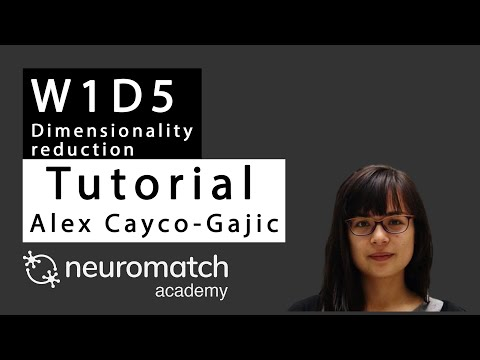

In [1]:
# @title Video: PCA Applications
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="SC86fv9Vx1E", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

---
# Setup
Run these cells to get the tutorial started.

In [2]:
# Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [4]:
#@title Helper functions


def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

---
# Section 1: Visualize MNIST in 2D using PCA

In this exercise, we'll visualize the first few components of the MNIST dataset to look for evidence of structure in the data. But in this tutorial, we will also be interested in the label of each image (i.e., which numeral it is from 0 to 9). Start by running the following cell to reload the MNIST dataset (this takes a few seconds). 

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
X = mnist.data
labels = [int(k) for k in mnist.target]
labels = np.array(labels)

To perform PCA, we now will use the method implemented in sklearn. Run the following cell to set the parameters of PCA - we will only look at the top 2 components because we will be visualizing the data in 2D.

In [6]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2) # Initializes PCA
pca_model.fit(X) # Performs PCA 

PCA(n_components=2)

## Exercise 1: Visualization of MNIST in 2D using PCA

Fill in the code below to perform PCA and visualize the top two  components. For better visualization, take only the first 2,000 samples of the data (this will also make t-SNE much faster in the following section of the tutorial so don't skip this step!)

**Suggestions:**
- Truncate the data matrix at 2,000 samples. You will also need to truncate the array of labels.
- Perform PCA on the truncated data.
- Use the function `visualize_components` to plot the labelled data.

In [7]:
help(visualize_components)
help(pca_model.transform)

Help on function visualize_components in module __main__:

visualize_components(component1, component2, labels, show=True)
    Plots a 2D representation of the data for visualization with categories
    labelled as different colors.
    
    Args:
      component1 (numpy array of floats) : Vector of component 1 scores
      component2 (numpy array of floats) : Vector of component 2 scores
      labels (numpy array of floats)     : Vector corresponding to categories of
                                           samples
    
    Returns:
      Nothing.

Help on method transform in module sklearn.decomposition._base:

transform(X) method of sklearn.decomposition._pca.PCA instance
    Apply dimensionality reduction to X.
    
    X is projected on the first principal components previously extracted
    from a training set.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        New data, where n_samples is the number of samples
        and n_features is

In [8]:
###################################################################
# Insert your code here to:
# Take only the first 2000 samples
# Perform PCA 
# Plot the data and reconstruction
################################################################### 
# X = ...
# labels = ...
# scores = pca_model.transform(X)
# visualize_components(...)
# plt.show()

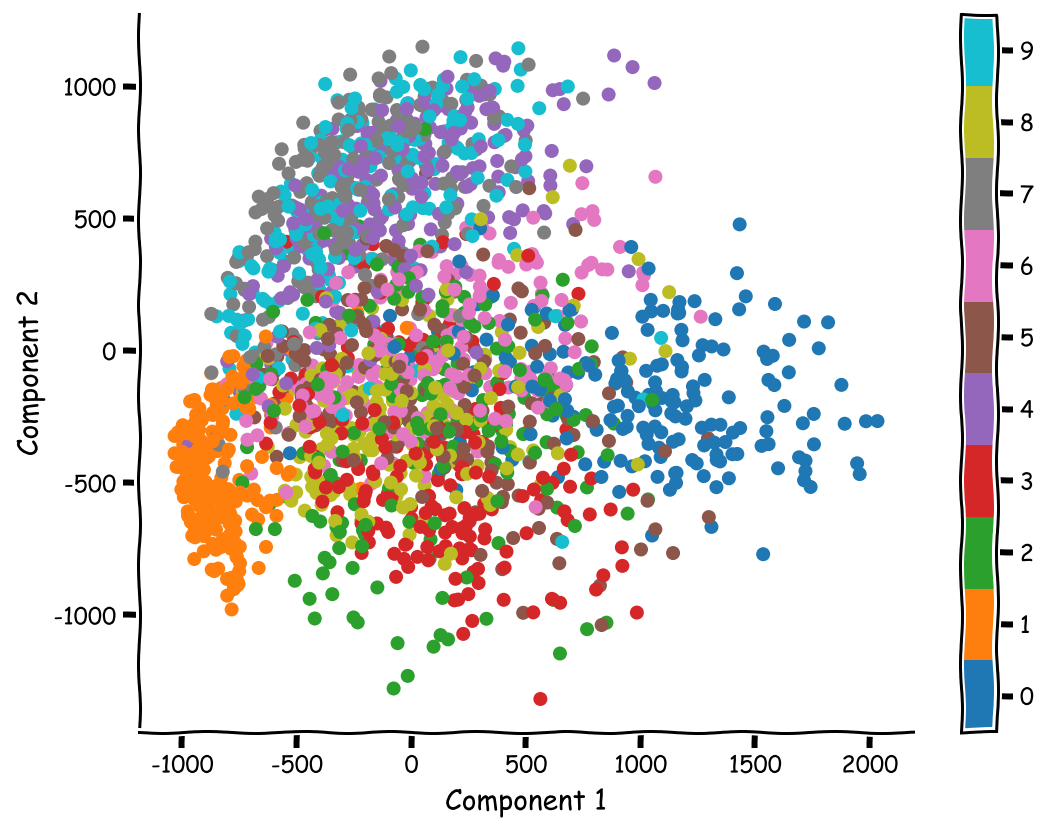

In [9]:
# to_remove solution
X = X[:2000, :]
labels = labels[:2000]

score = pca_model.transform(X)

with plt.xkcd():
  visualize_components(score[:, 0], score[:, 1], labels)

## Think!
- What do you see? Are different samples corresponding to the same numeral clustered together? Is there much overlap?
- Do some pairs of numerals appear to be more distinguishable than others?

---
# Section 2: Visualize MNIST in 2D using t-SNE


Video available at https://youtube.com/watch?v=ljqqIAhsN7w


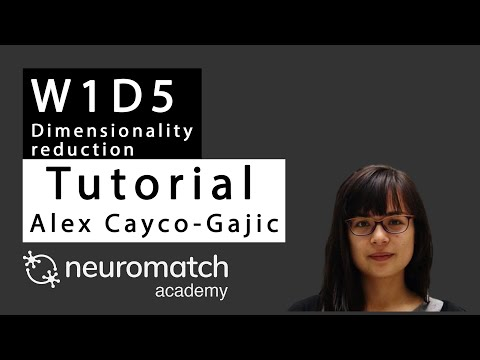

In [10]:
# @title Video: Nonlinear Methods
video = YouTubeVideo(id="ljqqIAhsN7w", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

Next we will analyze the same data using t-SNE, a nonlinear dimensionality reduction method that is useful for visualizing high dimensional data in 2D or 3D. Run the cell below to get started. 

In [11]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020) 

## Exercise 2: Apply t-SNE on MNIST
First, we'll run t-SNE on the data to explore whether we can see more structure. The cell above defined the parameters that we will use to find our embedding (i.e, the low-dimensional representation of the data) and stored them in `model`. To run t-SNE on our data, use the function `model.fit_transform`.

**Suggestions:**
- Run t-SNE using the function `model.fit_transform`.
- Plot the result data using `visualize_components`.

In [12]:
help(tsne_model.fit_transform)

Help on method fit_transform in module sklearn.manifold._t_sne:

fit_transform(X, y=None) method of sklearn.manifold._t_sne.TSNE instance
    Fit X into an embedded space and return that transformed
    output.
    
    Parameters
    ----------
    X : array, shape (n_samples, n_features) or (n_samples, n_samples)
        If the metric is 'precomputed' X must be a square distance
        matrix. Otherwise it contains a sample per row. If the method
        is 'exact', X may be a sparse matrix of type 'csr', 'csc'
        or 'coo'. If the method is 'barnes_hut' and the metric is
        'precomputed', X may be a precomputed sparse graph.
    
    y : Ignored
    
    Returns
    -------
    X_new : array, shape (n_samples, n_components)
        Embedding of the training data in low-dimensional space.



In [13]:
###################################################################
# Insert your code here to:
# Visualize the data
# embed = ... YOUR CODE HERE
# 
################################################################### 

# visualize_components(..., ..., labels)

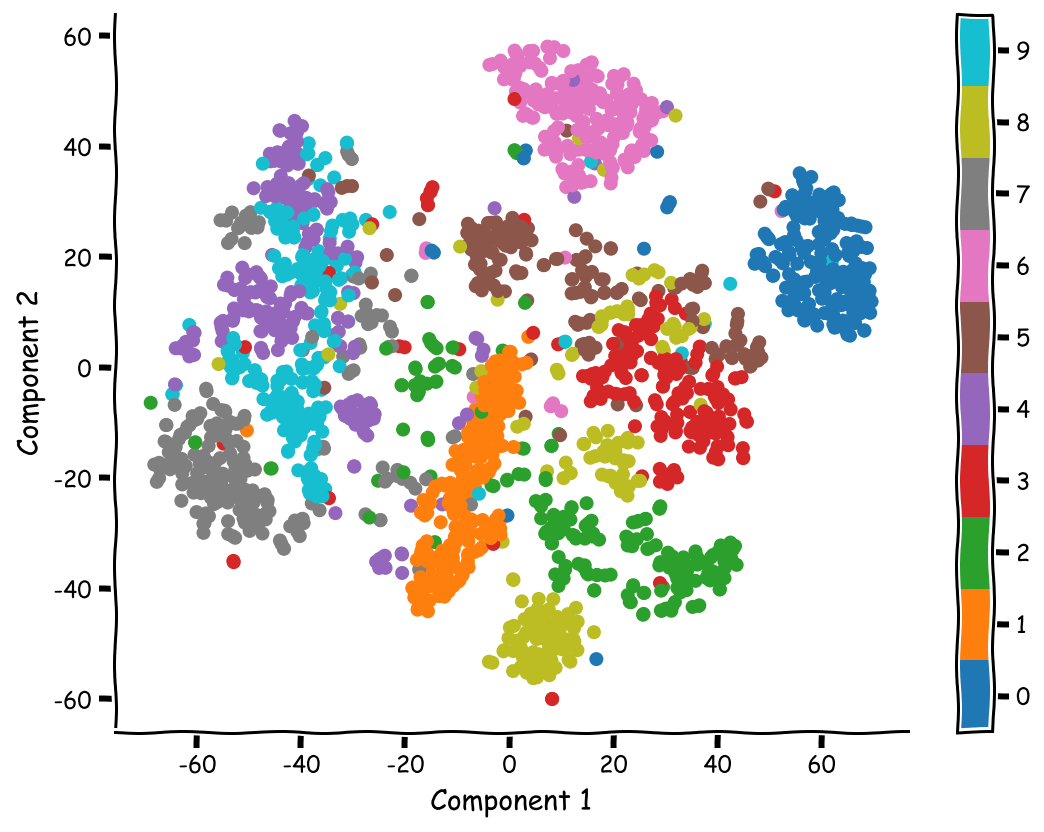

In [14]:
# to_remove solution

embed = tsne_model.fit_transform(X)

with plt.xkcd():
  visualize_components(embed[:, 0], embed[:, 1], labels)

## Exercise 3: Run t-SNE with different perplexities

Unlike PCA, t-SNE has a free parameter (the perplexity) that roughly determines how global vs. local information is weighted. Here we'll take a look at how the perplexity affects our interpretation of the results. 

**Steps:**
- Rerun t-SNE (don't forget to re-initialize using the function `TSNE` as above) with a perplexity of 50, 5 and 2.

In [15]:
def explore_perplexity(values):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors using different perplexities.

  Args:
    values (list of floats) : list with perplexities to be visualized

  Returns:
    Nothing.

  """
  for perp in values:

    ###################################################################
    # Insert your code here to:
    # redefine the t-SNE "model" while setting perplexity
    # perform t-SNE on the data and plot the results
    # for perplexity = 50, 5, and 2 (set random_state to 2020)
    ###################################################################
    # tsne_model = ... YOUR CODE GOES HERE
    # embed = tsne_model.fit_transform(X)
    # visualize_components(embed[:, 0], embed[:, 1], labels, show=False)
    # plt.title(f"perplexity: {perplexity}")
    # plt.show()

    # Comment these lines when you complete the function
    raise NotImplementedError("Student Exercise! Explore t-SNE with different perplexity")

# Uncomment when you complete the function
# values = [50, 5, 2]
# explore_perplexity(values)

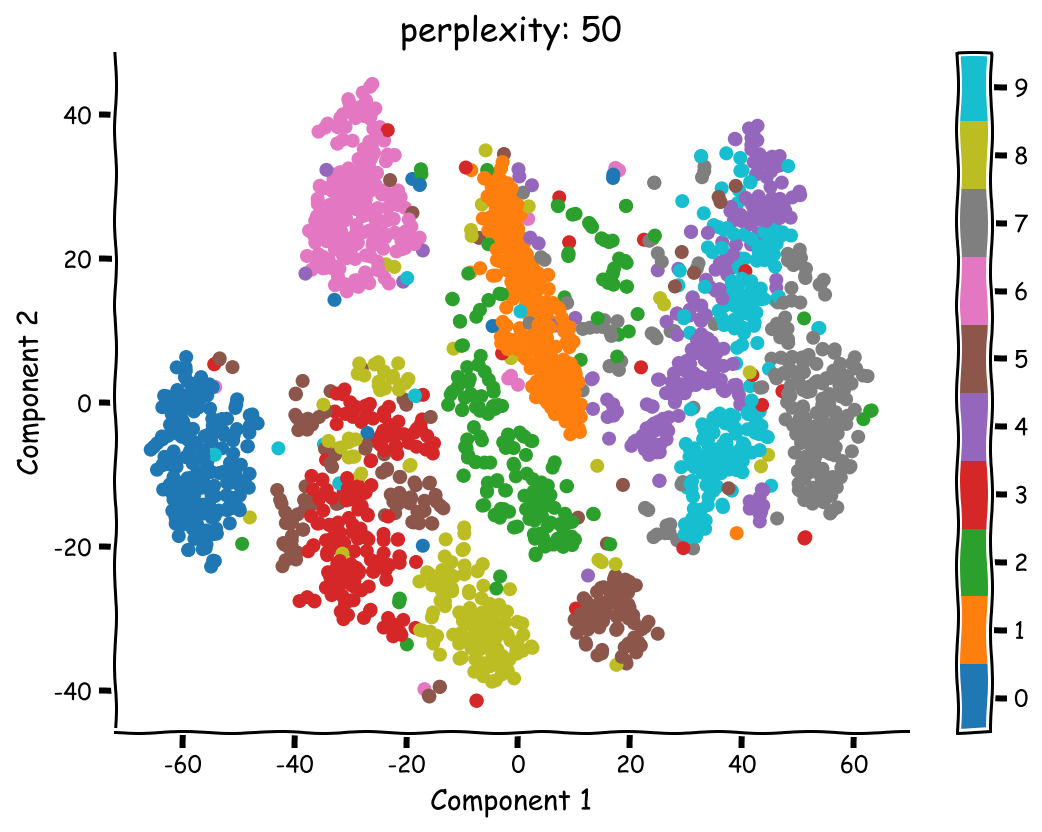

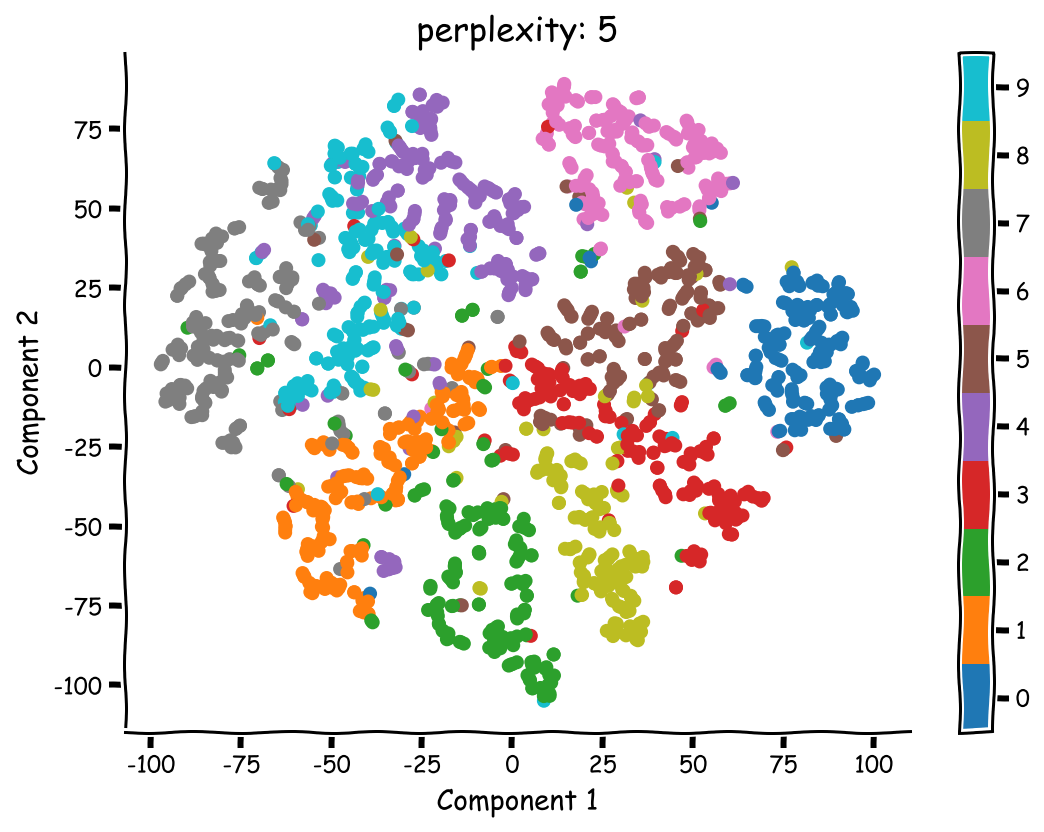

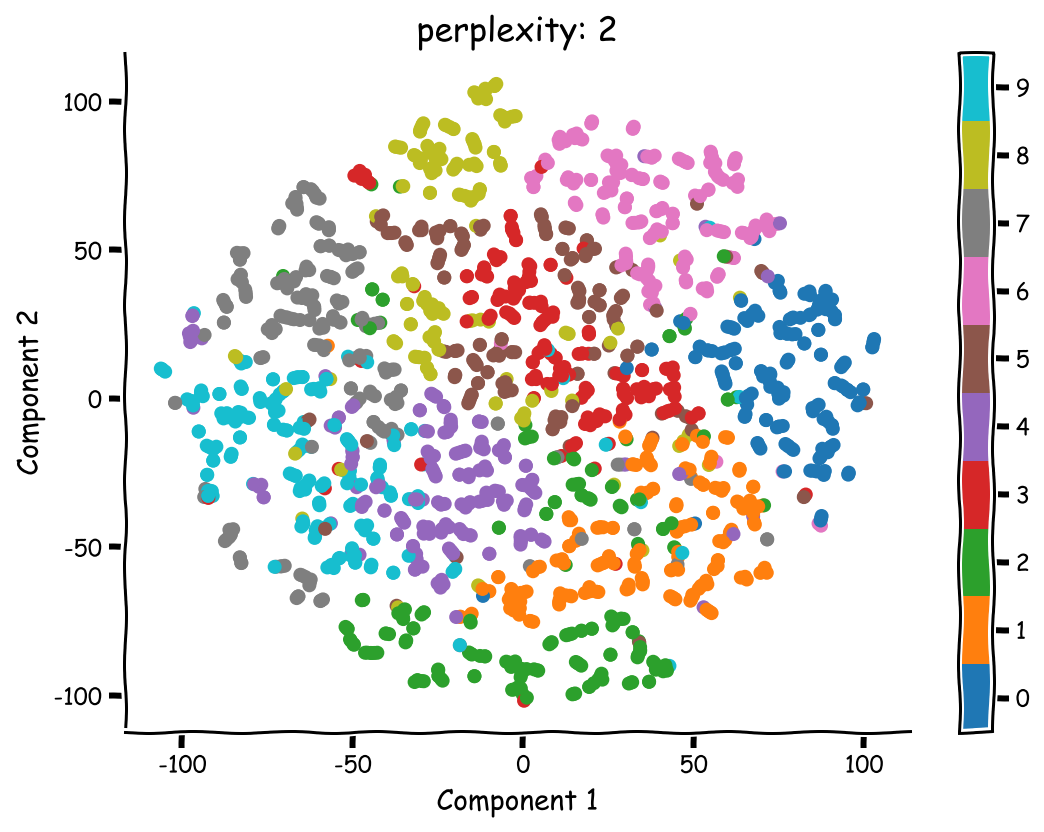

In [16]:
# to_remove solution

def explore_perplexity(values):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors using different perplexities.

  Args:
    values (list of floats) : list with perplexities to be visualized

  Returns:
    Nothing.

  """
  for perp in values:
    tsne_model = TSNE(n_components=2, perplexity=perp, random_state=0) 
    embed = tsne_model.fit_transform(X)
    visualize_components(embed[:, 0], embed[:, 1], labels, show=False)
    plt.title(f"perplexity: {perp}")
    plt.show()

values = [50, 5, 2]
with plt.xkcd():
  explore_perplexity(values)

## Think!

- What changes compared to your previous results using perplexity equal to 50? Do you see any clusters that have a different structure than before? 
- What changes in the embedding structure for perplexity equals to 5 or 2?

---
# Summary

* We learned the difference between linear and nonlinear dimensionality reduction. While nonlinear methods can be more powerful, they can also be senseitive to noise. In contrast, linear methods are useful for their simplicity and robustness.
* We compared PCA and t-SNE for data visualization. Using t-SNE, we could visualize clusters in the data corresponding to different digits. While PCA was able to separate some clusters (e.g., 0 vs 1), it performed poorly overall.
* However, the results of t-SNE can change depending on the choice of perplexity. To learn more, we recommend this [Distill paper](https://distill.pub/2016/misread-tsne/).
